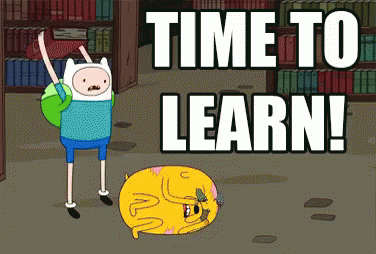

Src: https://giphy.com/explore/time-to-learn

# **Image Acquisition and Processing using Python**:

Prepared by: Richard Asiamah

## Objectives:

* Understand the fundamental concept of representing images (2D and 3D) as matrices in the context of deep learning.
* Differentiate between RGB and grayscale images, their channel representations, visual appearances, advantages, and use cases.
* Gain an overview of 3D medical imaging, particularly MRI scans, and understand the challenges and opportunities in processing 3D medical images.
* Learn how to load, preprocess, and apply transformations and augmentations to 2D images using PyTorch and torchvision.
* Understand techniques for loading, preprocessing, and applying transformations and augmentations to 3D images using PyTorch libraries like torchio.

# 1. Introduction to Images as Matrices

## Image

* A computer image is a matrix (a two-dimensional (2D) array) of pixels.
* In the field of medical imaging, the images may span all spatial dimensions (`x-`, `y-` axis) and also the depth. Hence making it a 3D


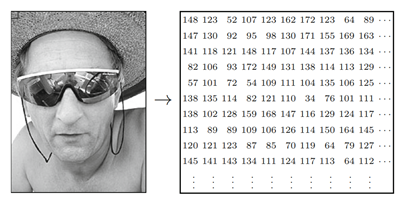

## Image Size

The size of an image is determined directly from the width M (`#` `of colums`) and height N (`#` `of rows`)

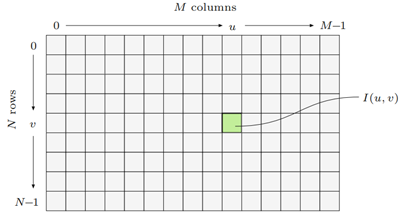

## Pixel and Voxel

Pixels carry information about the brightness of a particular location in digital image.

Pixel is generally applied to `2D` and replaced by voxel in `3D` images

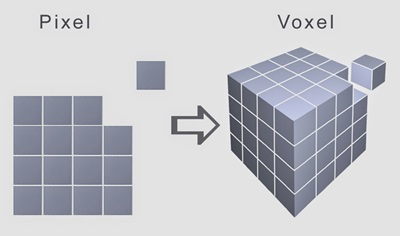

**Bit-depth** determines range of values for pixel

It is calculated as: `[0, 2^bitdepth - 1]`

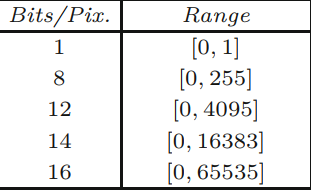

## Image Types

Photographic images: `JPEG`, `GIF`, `PNG`, etc

Medical Imaging: `DICOM`, `NIFTI`, `Analyze AVW`

Microscope Imaging: `TIFF`, `ICS`, `IMS`

## Reading Images (`2D` and `3D`) and accessing it Pixels

In [ ]:
# import the libraries to read the image

import cv2
from google.colab.patches import cv2_imshow
import urllib
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully")

Libraries imported successfully


In [ ]:
# set the url for the image
url = "https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2013/06/mri_brain_scan/12915330-1-eng-GB/MRI_brain_scan.jpg"

# extract the content for the URL
url_response = urllib.request.urlopen(url)



In [ ]:
# convert the response to numpy array
img_array = np.array(bytearray(url_response.read()), dtype = np.uint8)

# decode the image
img_2D = cv2.imdecode(img_array, 0)


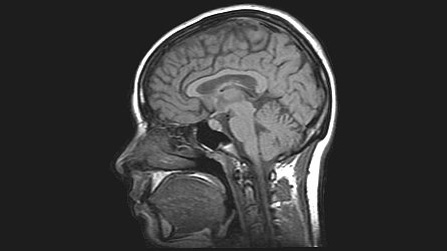

In [ ]:
# display the image
cv2_imshow(img_2D)

In [ ]:
# get the size of the size of the image
img_size = img_2D.size
print(img_size)

# Note: The size is obtained by multiplying the width and height of the image

112197


In [ ]:
# get the shape of the image
img_shape = img_2D.shape
print(img_shape)

# The result belows tells you that the image is a grayscale with only 1 channel.
# We will talk about grayscale and RGB images later

(251, 447)


array([[29, 29, 29, ..., 29, 29, 29],
       [29, 29, 29, ..., 29, 29, 29],
       [29, 29, 29, ..., 29, 29, 29],
       ...,
       [29, 29, 29, ..., 29, 29, 29],
       [29, 29, 29, ..., 29, 29, 29],
       [29, 29, 29, ..., 29, 29, 29]], dtype=uint8)
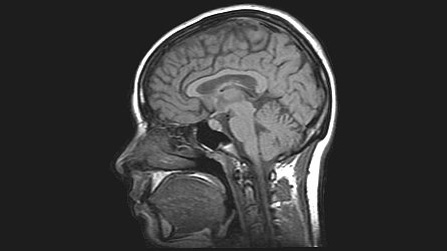

In [ ]:
# let's print the array of the above image
img_2D

# Take note of the output. click on the show data to see the pixels values

In [ ]:
# We may choose to access a certain portion of the image
# This can be done by accessing some pixels

new_img = img_2D[100:200, 100:300]

# Here we accessed the pixel value from 100th to 199th position in row (height)
# and also from 100th to 299th position in the column (width)
# Remember that in python, last number is excluded during indexing

array([[ 29,  29,  29, ..., 150, 147, 139],
       [ 29,  29,  29, ..., 153, 152, 142],
       [ 29,  29,  29, ..., 152, 155, 142],
       ...,
       [ 29,  29,  29, ..., 139, 115,  90],
       [ 29,  29,  29, ..., 158, 113,  87],
       [ 29,  29,  29, ..., 160, 127, 101]], dtype=uint8)
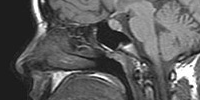

In [ ]:
# get the accessing pixels
new_img

# click on the show data to convert it from pixel values to resulted image
# Accessing the pixel of an images is synonymous to cropping the image

## Grayscale Images

* It consists of single channel
* Grayscale images uses 8 bits (1 byte) per pixel
* Intensity values ranges from 0 ... 255
* 0 represent minimum brightness (black) and 255 the maximum brightness (white)
* Grayscale images have a channel of 1

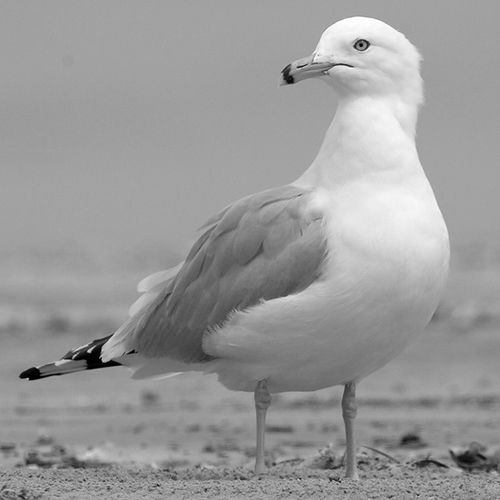

In [ ]:
# let's load an image as a grayscale using cv2

url = "http://www.birdweb.org/birdweb/images/rbgu_gl.jpg"

# extract the content for the URL
url_response = urllib.request.urlopen(url)

# convert the response to numpy array
img_array = np.array(bytearray(url_response.read()), dtype = np.uint8)

# decode the image as a grayscale image
img_gray = cv2.imdecode(img_array, 0)

cv2_imshow(img_gray)



In [ ]:
# Let's find out the shape of the image above
# The shape will give us the width, height and channel
# The channel will not be shown because a channel of 1 is not displayed
print(img_gray.shape)

(500, 500)


Since we have one channel for the grayscale, one cannot extract any other channel.

Let's proceed to RGB images 😊

## RGB Images

* RGB images are based on the primary colors RED, GREEN and BLUE (RGB)
* It uses 8 bits for each color components.
* In all 3 x 8 = 24 bits are needed to encoded all the three components
* The range of individual of each color component is 0 ... 255

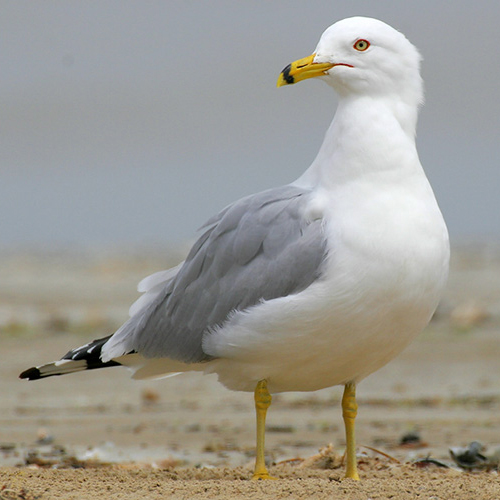

In [ ]:
# Let's load RGB image.
# It is going to be the same image.

# decode the image as a rgb image
img_rgb = cv2.imdecode(img_array, 1)

cv2_imshow(img_rgb)

😲 Do you see any difference between this image and grayscale image above

✌ Give youself a thumbs up. You getting it

Now let's proceed to find the shape of the `img_rgb` image above 🚶

In [ ]:
# let's get the shape
# The code below will return three values: width, height and channel
# We see the channel here to be 3:
# 3 channel = Red component, Green component and Blue Component

print(img_rgb.shape)

(500, 500, 3)


We can split the img_rgb into its various component

Come one, lets do it together 💪

In [ ]:
# we unpack the result of the splitting into red, green and blue variables

red, green, blue = cv2.split(img_rgb)

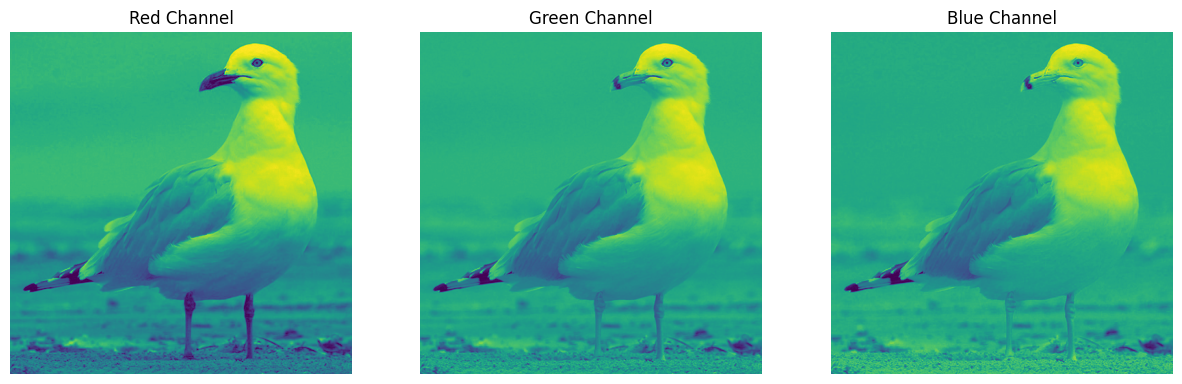

In [ ]:
# let's show the red the component
# Create a figure with subplots

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Display each channel in its respective subplot
axs[0].imshow(red)
axs[0].set_title('Red Channel')
axs[0].axis('off')

axs[1].imshow(green)
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(blue)
axs[2].set_title('Blue Channel')
axs[2].axis('off')

plt.show()


😰 This is weird!!

Do you see any difference between the images above.

Look at it once again

Why do we need images in Grayscale and RGB? 😶

Here is why

Let's find out together 👉

👉 Why GrayScale and RGB Images in Deep Learning

### **Grayscale**
* Graysclae images simplify algorithms and reduce computational requirements
* Grayscale images are crucial for medical practices for computer-aided diagnosis such as X-ray, CT scans
* Grayscale images are preferred for applications that focus on the shape or structure of objects.


### **RGB**
* RGB images retain color information, making them suitable for application where color is important.

## 3D Images

* A 3D image is a 3D volume comprising of a series of 2D planes
* 3D images have the shape of the form ((`plane`, `row`, `column`)
* A multichannel 3D image has **channel** dimension added to give information about the color.
* 3D multichannel has the format: (`plane`, `row`, `column`, `channel`)

## 3D Medical Imaging

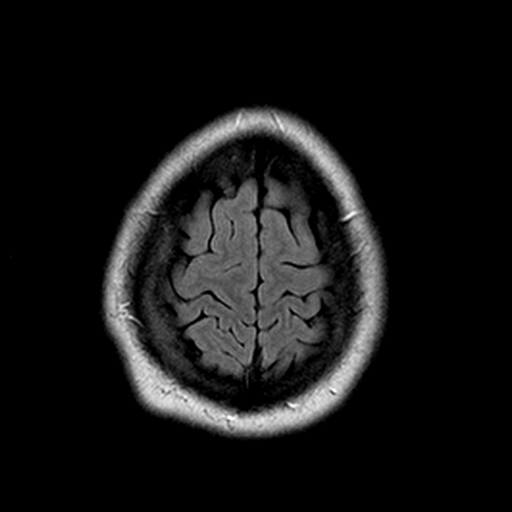

src: https://www.skybots.net/mri-scan-top

3D medical imaging involves the:

  * acquistion
  * reconstruction
  * representation  
  
of three-dimensional objects of the human body for diagnostic, planning, and research purposes

Processing medical 3D images comes with many challenges 😯

These challenges include 👇:
  * 3D medical images (MRI scans) are incredibly large datasets requiring significant storage space and powerful computing resources for processing tasks like segmentation, analysis, and visualization.

* Compared to traditional 2D images, 3D medical images add another dimension (depth) to the data, increasing the computational complexity of algorithms to analyze and interpret the information.



There are a lot of opportunities that comes with processing 3D images 🙂

These include 👇:
* 3D image processing helps to identify abnormalities, detect tumors, or classify diseases. This can lead to earlier and more accurate diagnoses, improving patient outcomes.

## Plotting of 2D slices and visualizing of 3D volumes of medical images

In [ ]:
# installl nibabel library
!pip install nibabel

In [ ]:
# import the nibable library
import nibabel as nib
import os
from nibabel.testing import data_path
from matplotlib import animation
from IPython.display import HTML


print("Libraries imported successfully")

Libraries imported successfully


In [ ]:
# load one of the example images of NIfTI

example_ni1 = os.path.join(data_path, 'example4d.nii.gz')

n1_img = nib.load(example_ni1)


In [ ]:
# Access the image data
data = n1_img.get_fdata()

# Print the shape of the image data
print(f"Image shape: {data.shape}")

# Pay attention to the output

Image shape: (128, 96, 24, 2)


In [ ]:
# Let's get the dimension
data.ndim

4

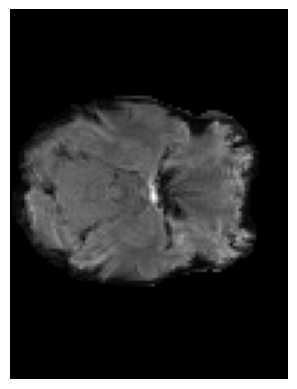

In [ ]:
# Let' plot a slice of the NIfTI data loaded
# Select the first 2D slice of the first channel

selected_slice = data[:, :, 0, 0]  # the image has two channel (0, 1)

# Now you can visualize this 2D slice
plt.imshow(selected_slice, cmap='gray')
plt.axis('off')
plt.show()


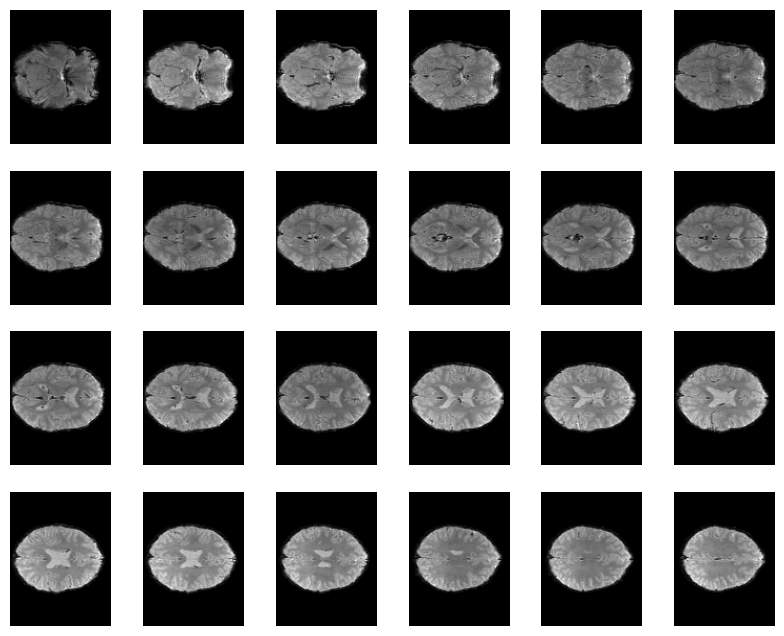

In [ ]:

# Select 5 slices from the third dimension
slices = [data[:, :, i, 0] for i in range(24)]

# Create a figure with 2 rows and 5 columns of subplots
fig, axs = plt.subplots(4, 6, figsize=(10, 8))

# Flatten the axs array to iterate over it easily
axs = axs.ravel()

# Display each slice in its own subplot
for ax, slice in zip(axs, slices):
    ax.imshow(slice, cmap='gray')
    ax.axis('off') # Hide the axis for a cleaner look

# Display the figure with the subplots
plt.show()


In [ ]:
# Let's create animation through all the slices in order to view 3D volume

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 3))

# Define a function to update the plot for animation
def update_plot(frame):
    ax.clear()
    ax.imshow(data[:, :, frame, 0], cmap='gray')
    ax.set_title(f'Slice {frame}')
    ax.axis('off')

plt.close()

# Create an animation object
ani = animation.FuncAnimation(fig, update_plot, frames=data.shape[2], interval=50, repeat=True)

# show the animation
HTML(ani.to_html5_video())


# 4. Handling Images with Pytorch

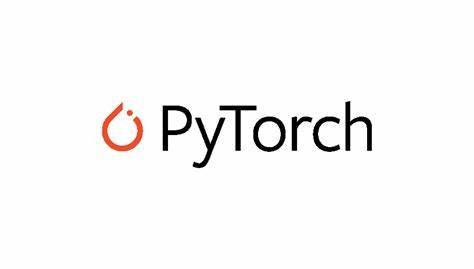

## Introduction to Pytorch

*  PyTorch is an open-source machine learning and deep learning framework developed by Facebook AI Research.

* PyTorch allows you to manipulate and process data and write machine learning algorithms using Python code.

## Loading and Preprocessing 2D images using torchvision transforms

In [ ]:
# import the necessary libraries
import requests
import zipfile
from pathlib import Path
import random
from PIL import Image


print("Libraries imported successfully")


Libraries imported successfully


### Download the dataset and unzip it into our current directory

In [ ]:

# Setup path to data folder
data_path = Path("Data/")
image_path = data_path / "Meningiomas"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download Meningiomas using streaming
    url = "https://drive.google.com/uc?id=1knMSyRbEI7OapsM4gEEFdmPKoT3X0dqY"
    file_path = data_path / "Meningiomas.zip"
    with requests.get(url, stream=True) as r:
        r.raise_for_status() # Ensure we got a valid response
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): # Download in chunks
                f.write(chunk)

    # Unzip Meningiomas
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        print("Unzipping Meningiomas...")
        zip_ref.extractall('.')


Did not find Data/Meningiomas directory, creating one...
Unzipping Meningiomas...


### Walk through the dataset and get a peak to the total number of dataset

In [ ]:
# set a new path
image_path = Path("Meningiomas/")

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 0 directories and 275 images in 'Meningiomas'.


### Randomly visualize the dataset

Random image path: Meningiomas/Tumor (188).jpg
Image class: Meningiomas
Image height: 256
Image width: 256


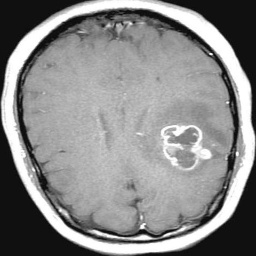

In [ ]:
# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

## Data Transformation

### Transforming the dataset 🍓



Before we can use our image data with PyTorch we need to 👉 :

* Turn it into tensors (numerical representations of our images);
* Turn it into a `torch.utils.data.Dataset`;
* Turn it into `torch.utils.data.DataLoader`

In [ ]:
# import base libraries

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

print("Libraries imported successfully")

Libraries imported successfully


Transforming data with `torchvision.transforms`

With the `torchvision.transforms`, the following transforms will be done:

* Resize the images using `transforms.Resize()` (from about `256x256` to `64x64`).
* Flip our images randomly on the horizontal using `transforms.RandomHorizontalFlip().`
* Turn our images from a PIL image to a PyTorch tensor using `transforms.ToTensor().`

In [ ]:
# We transform the image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

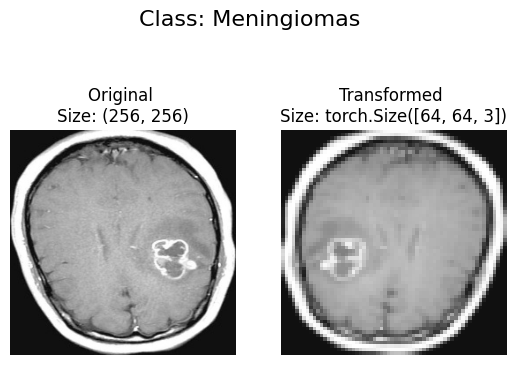

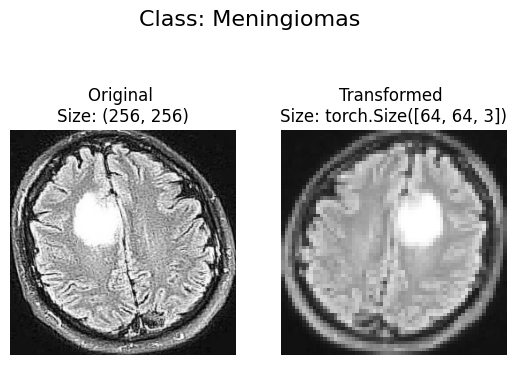

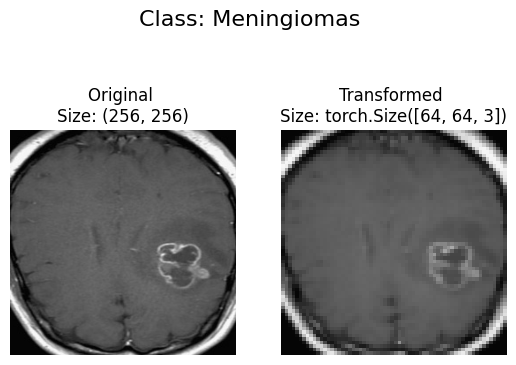

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

#5 Processing 3D Images with PyTroch (torchio)

[TorchIO](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8542803/) is an open-source Python Library for:
* efficient loading
* preprocessing
* augmentation
* patch-based sampling of medical images for deep learning

TorchIO is used seamlessly alongside higher-level deep learning frameworks for medical imaging such as Medical Open Network for AI ( [MONAI](https://monai.io/) )

### Techniques for loading and preprocessing 3D images 👇.

* `Image class` convert voxel indices to world coordinates in milimeters
* `Subclasses` are used to indicate specific types of images (`ScalarImage` and `LabelMap`) which are used to store scans (MRI) and segmentation
* An instance of `Image` can be created using filepath, which uses lazy loading.

### Implementing transformations and augmentations for 3D data.

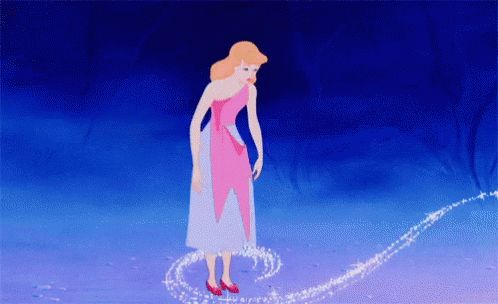

src: https://tenor.com/search/transformation-gifs

Come on 😀. let's do some data transformation and augmentation together 🚶

In [ ]:
!pip install torchio --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
# import the neccesary libraries
import torchio as tio
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

print("Libraries imported successsfully")

Libraries imported successsfully


### Spatial transforms

**Spatial transforms** alter the image bounds or the positions of voxels. These modifications are consistently applied across all images in the dataset.

The dataset for this section can be obtained from [`torch.datasets`](https://torchio.readthedocs.io/datasets.html)

Sample subject: FPG(Keys: ('t1', 'seg'); images: 2)


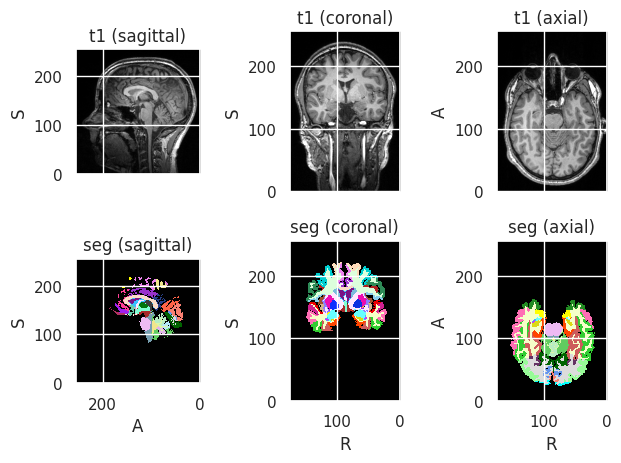

In [ ]:
# Let's get the data
fpg = tio.datasets.FPG()

print("Sample subject:", fpg)

fpg.plot()


### Crop or pad

[`CropOrPad`](https://torchio.readthedocs.io/transforms/preprocessing.html#croporpad) is used to crop information that is not of interest or used to pad the image when the target image is larger than the input image

In [ ]:
# let's get the shape of the image first
fpg.t1.spatial_shape

(256, 256, 176)

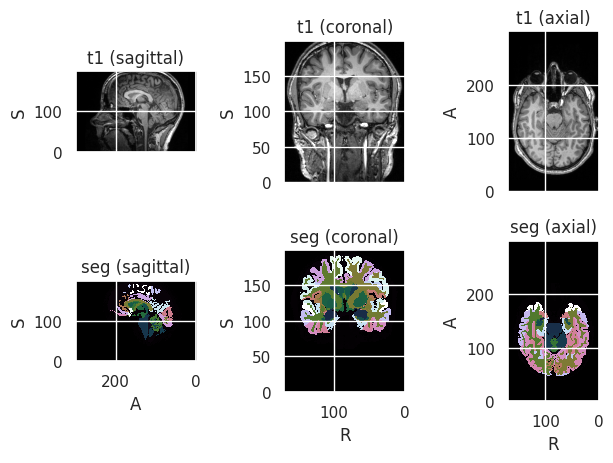

In [ ]:
# Now let's set a new shape size for the image and crop it
target_shape = 300, 200, 170

crop_pad = tio.CropOrPad(target_shape)

fpg_crop = crop_pad(fpg)

fpg_crop.plot()

### Random flip

[`RandomFlip`](https://torchio.readthedocs.io/transforms/augmentation.html#randomflip/) is used to flip the image horizontally

**Hey!!!** 🤔, knowing the image orientation is very crucial before you can start performing this augmentation

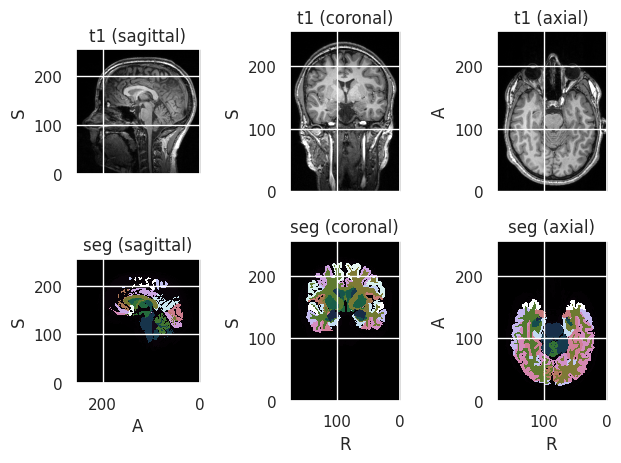

In [ ]:
# Let's perform a random flip of the image

random_flip = tio.RandomFlip(axes=("LR",))    # flip along lateral axis only

fpg_flipped = random_flip(fpg)

fpg_flipped.plot()

### Random anisotropy

Anisotropic resampling is done to preprocess medical images before they are fed into the neural network.

[`RandomAnisotropy`](https://torchio.readthedocs.io/transforms/augmentation.html#torchio.transforms.RandomAnisotropy) is used to achieve this augmentation.

Applied transforms:
[Resample(target=(1.0, 2.9925997257232666, 1.0), image_interpolation=nearest, label_interpolation=nearest, pre_affine_name=None, scalars_only=True), Resample(target=((256, 256, 176), array([[  0.        ,   0.        ,   1.        , -82.6807251 ],
       [ -1.        ,   0.        ,   0.        , 132.33735657],
       [  0.        ,  -1.        ,   0.        , 102.21686554],
       [  0.        ,   0.        ,   0.        ,   1.        ]])), image_interpolation=linear, label_interpolation=nearest, pre_affine_name=None, scalars_only=True)]


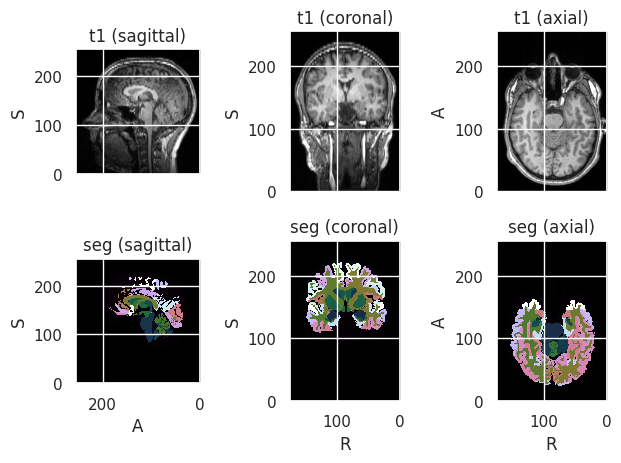

In [ ]:
random_anisotropy = tio.RandomAnisotropy()
fpg_anisotropic = random_anisotropy(fpg)

print('Applied transforms:')

print(fpg_anisotropic.history)

fpg_anisotropic.plot()

Did you noticed a any difference between this plot and the original plot for this images 🤔?



The computation resources used in the training of 3D  medical images is quiet enormous 🤭.

There are various ways used to efficiently handle 3D medical images 👇

* Conversion of 3D volume into a series of 2D slices
* Resampling of the voxel size
* Normalizing the image to a common range value

# 6. Hands-On Exercises

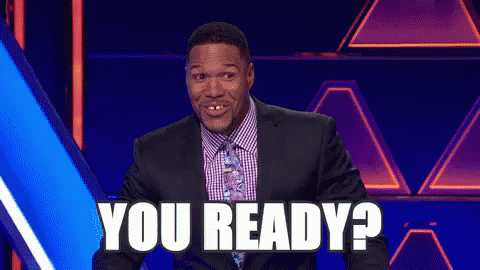

Src: https://tenor.com/view/you-ready-ready-excited-eyebrow-raise-michael-strahan-gif-9497097

The code below will help you download the datasets for the exercise 😀

Run and do not alter part of it ⚠

The extension of the Gliomas imags is `.bmp`

Remember to change the extension appropriately when working it 🤔

In [ ]:

# Setup path to data folder
data_path = Path("Data/")
image_path = data_path / "Gliomas"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download Meningiomas using streaming
    url = "https://drive.google.com/uc?id=15vAoRhjw2DQDknvggR3K38NXYqDvNuhm"
    file_path = data_path / "Gliomas.zip"
    with requests.get(url, stream=True) as r:
        r.raise_for_status() # Ensure we got a valid response
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): # Download in chunks
                f.write(chunk)

    # Unzip Meningiomas
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        print("Unzipping Gliomas...")
        zip_ref.extractall('.')



Did not find Data/Gliomas directory, creating one...
Unzipping Gliomas...


1. **Using the above codes as reference, complete the code below to randomly access one of the Gliomas image sets.**

❗❗❗❗❗❗❗❗ Remember, the file extension of the image set is `.bmp` ❗❗❗❗❗❗❗❗

Random image path: Gliomas/12.bmp
Image class: Gliomas
Image height: 512
Image width: 512


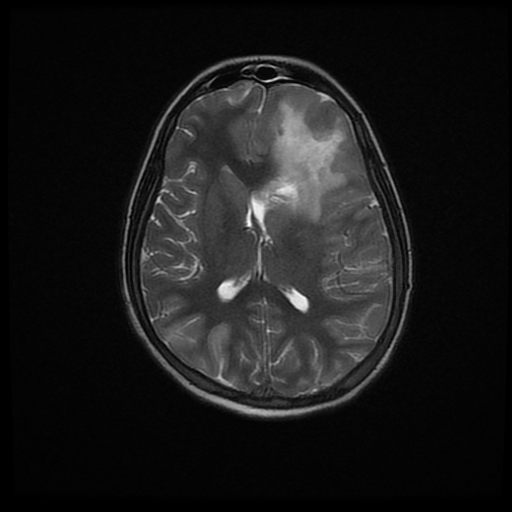

In [ ]:
# set a new path
image_path =   # TO DO: complete this line of code

# Set seed
random.seed(42)


image_path_list =  # TODO: complete this line of code

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

😸 What did you see?


**2. Print the shape, dimension and size for the image accessed above**




In [ ]:
# REMEMBER, the reandomly accessed IMAGE was stored in the variable img

# # get and print the shape of img using .shape attribute
# # PUT YOUR CODE HERE


# # get and print the size of img using .size attribute
# # PUT YOUR CODE HERE


# # get and print the dimension of img  .ndim attribute
# # PUT YOUR CODE HERE




😆 You will get an error when you try to access the **shape** and **dimension** using `PIL` library for the above cell.
This is because we are working with bitmaps and we have to import Bitmap plugins which quiet complex when using the `PIL` library

🤔 In order to resolve this issue, we can use `cv2` from OpenCV which is able to deal bitmap images.

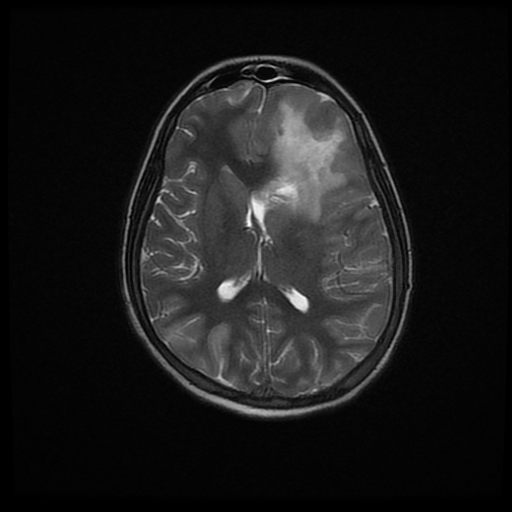

In [ ]:

# let's read the
img = cv2.imread(str(random_image_path))

cv2_imshow(img)

😆 Voila !, we have achieved the same thing using `cv2`

Now let's access the shape, dimension of the image above to know more about the image

You remember we can extract the Red, Green, and Blue component of the image if it an RGB image with 3 channel

In [ ]:
# REMEMBER, the reandomly accessed IMAGE was stored in the variable img

# # get and print the shape of img using .shape attribute
# # PUT YOUR CODE HERE


# # get and print the size of img using .size attribute
# # PUT YOUR CODE HERE



# # get and print the dimension of img  .ndim attribute
# # PUT YOUR CODE HERE



3. 🖊 **Discuss the type of image you are working with now based on the above results. 2–3 lines of sentences**

In [ ]:
"""
PUT YOUR ANSWER HERE






"""

4. **You are going to crop the above imge. This is also know as accessing the pixel in a specified range.**

  The task here to access the pixel of the image above in the range `150:400` for both the width and height

In [ ]:
crop_img =  # TODO: Complete the line of code


cv2_imshow(crop_img)

5. **You are going to write a function to transform some of the image. Do you remember we did some transformation above using `torch` and `torchvision` transforms**



In [ ]:
# We transform the image
new_transform = transforms.Compose([
    # Resize the images to 64x64
    ,     # TODO: Complete the line of code

    # Flip the images randomly on the horizontal
    ,   # TODO: Complete the line of code

    # Turn the image into a torch.Tensor
         # TODO: Complete the line of code
])

Let's visualize our tranform above to see if the function did what we specified it to do.

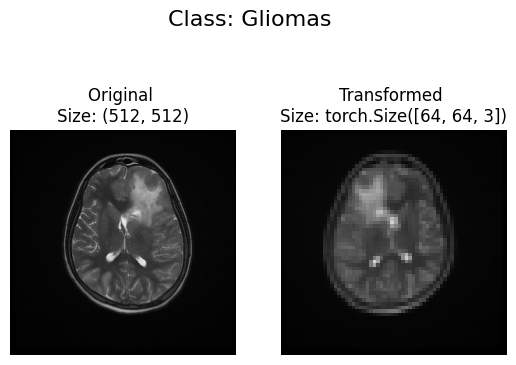

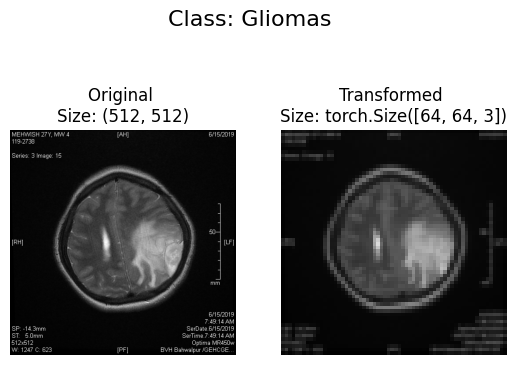

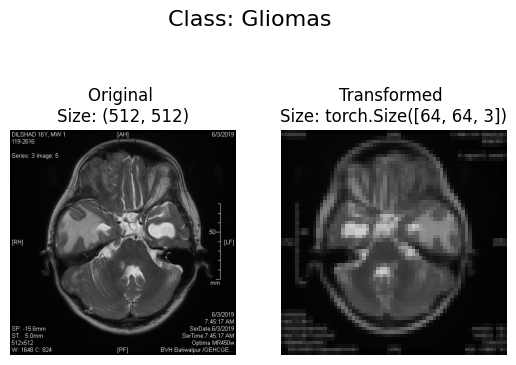

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=new_transform,
                        n=3)

In the exercise below, we are going to work with 3D images.


In [ ]:
# Donot alter any code here
img_nii = os.path.join(data_path, 'example_nifti2.nii.gz')

img3D = nib.load(img_nii)


**6. Obtain the data of the image you have loaded now.**

  This [website](https://nipy.org/nibabel/coordinate_systems.html) might be of help to you

In [ ]:

img3D_data =  img3D.get_fdata() # TO DO: Complete this line of code


**2. Print the shape, dimension and size for the image (`img3D_data`) accessed above**

In [ ]:
# REMEMBER, data of the image was stored in img3D_data

# # get and print the shape of img using .shape attribute
# # PUT YOUR CODE HERE
print(img3D_data.shape)

# # get and print the size of img using .size attribute
# # PUT YOUR CODE HERE
print(img3D_data.size)

# # get and print the dimension of img  .ndim attribute
# # PUT YOUR CODE HERE
print(img3D_data.ndim)


(32, 20, 12, 2)
15360
4


7. **Based on the above result, describe and discuss the type of image you are working with now. 2 - 3 lines of sentences**

In [ ]:
"""
# Put your answer here (DO NOT RUN THIS CELL)








"""

## References

1. https://www.learnpytorch.io/
2. https://nipy.org/nibabel/nifti_images.html
3. https://lukas-snoek.com/NI-edu/fMRI-introduction/week_1/python_for_mri.html